# Time Series Analysis - Employment by sector forcast

## 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from numpy import log
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Import the data

In [16]:
df = pd.read_csv(r'C:\Users\Sanjeshni\Desktop\doc\Capstone Project\Employment_by_Industry_1.csv')


## 3. Exploratory Data Analysis

In [17]:
# Checking the first five row of the data
df.head()

,Period,Primary_Industry,Goods-producing industries,Service industries,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,...,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Arts and Recreation Services,Other Services
0,2019-05-01,309839,1236421,4950473,96007,238502,232878,19016,171566,112355,...,146901,93421,32985,62940,34062,169464,111136,133655,40709,71800
1,2019-06-01,305833,1235296,4945864,92219,233050,227383,19053,171815,111690,...,144688,96036,31368,62836,33968,169097,105300,135172,41343,72078
2,2019-07-01,306471,1235365,4948206,92710,231264,225474,19217,171966,111124,...,144510,95614,31232,63008,34127,168465,100245,136117,41667,72182
3,2019-08-01,305536,1235864,4955067,93407,232961,227200,19296,171748,110744,...,145570,92442,32614,63218,33603,168916,100255,134942,41709,72005
4,2019-09-01,306734,1240464,4978518,94106,231828,226052,19423,172541,110190,...,147165,95911,31490,63295,33981,166432,100575,137651,41736,72778


In [18]:
# Checking the data infomation and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Period                                           46 non-null     object
 1   Primary_Industry                                 46 non-null     int64 
 2   Goods-producing industries                       46 non-null     int64 
 3   Service industries                               46 non-null     int64 
 4   Agriculture, Forestry and Fishing                46 non-null     int64 
 5   Mining                                           46 non-null     int64 
 6   Manufacturing                                    46 non-null     int64 
 7   Electricity, Gas, Water and Waste Services       46 non-null     int64 
 8   Construction                                     46 non-null     int64 
 9   Wholesale Trade                              

In [19]:
# Checking the data shape
df.shape

(46, 21)

In [20]:
# checking to see if any null values
df.isnull().sum()

Period                                             0
Primary_Industry                                   0
Goods-producing industries                         0
Service industries                                 0
Agriculture, Forestry and Fishing                  0
Mining                                             0
Manufacturing                                      0
Electricity, Gas, Water and Waste Services         0
Construction                                       0
Wholesale Trade                                    0
Retail Trade                                       0
Accommodation and Food Services                    0
Transport, Postal and Warehousing                  0
Information Media and Telecommunications           0
Financial and Insurance Services                   0
Rental, Hiring and Real Estate Services            0
Professional, Scientific and Technical Services    0
Administrative and Support Services                0
Public Administration and Safety              

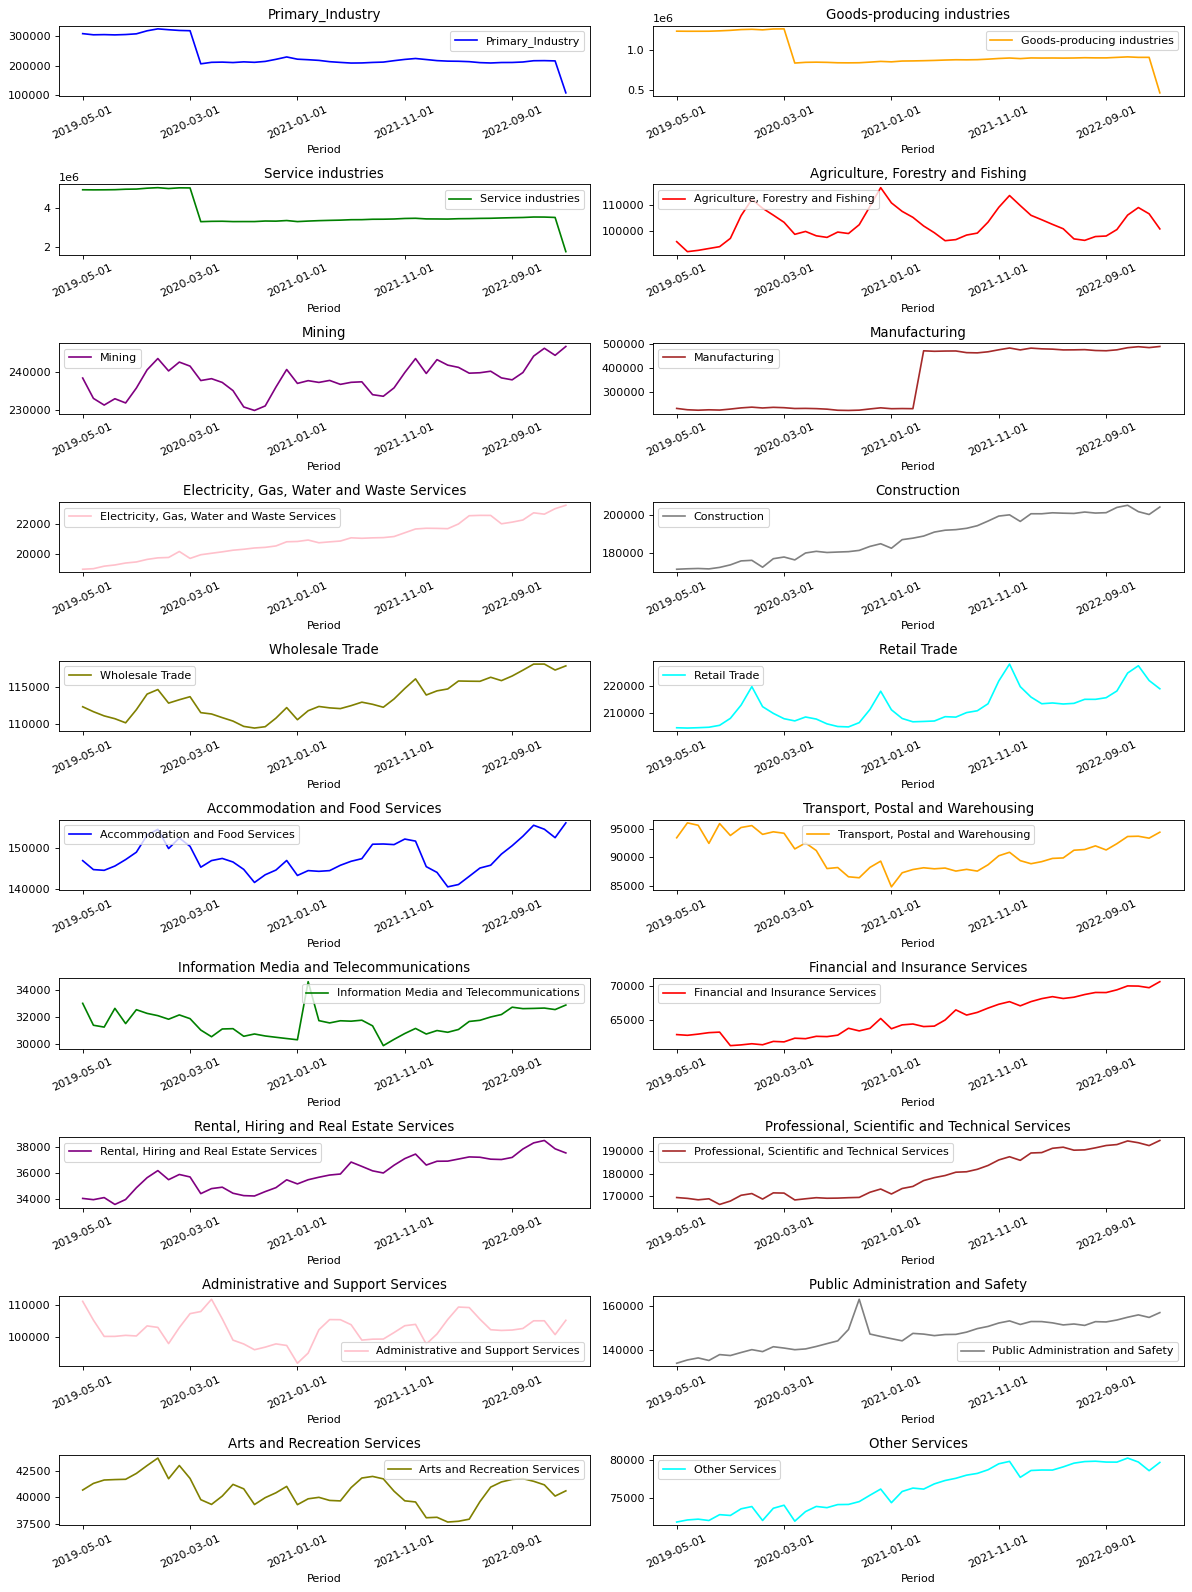

In [21]:
# Doing some data analysis 
# Plotting line gragh to see the performance of the data ie the employment trend with different industries


titles = [
         'Primary_Industry'
        ,'Goods-producing industries'
        ,'Service industries'
        ,'Agriculture, Forestry and Fishing'
        ,'Mining'
        ,'Manufacturing'
        ,'Electricity, Gas, Water and Waste Services'
        ,'Construction'
        ,'Wholesale Trade'
        ,'Retail Trade'
        ,'Accommodation and Food Services'
        ,'Transport, Postal and Warehousing'
        ,'Information Media and Telecommunications'
        ,'Financial and Insurance Services'
        ,'Rental, Hiring and Real Estate Services'
        ,'Professional, Scientific and Technical Services'
        ,'Administrative and Support Services'
        ,'Public Administration and Safety'
        ,'Arts and Recreation Services'
        ,'Other Services'
]

feature_keys = [
         'Primary_Industry'
        ,'Goods-producing industries'
        ,'Service industries'
        ,'Agriculture, Forestry and Fishing'
        ,'Mining'
        ,'Manufacturing'
        ,'Electricity, Gas, Water and Waste Services'
        ,'Construction'
        ,'Wholesale Trade'
        ,'Retail Trade'
        ,'Accommodation and Food Services'
        ,'Transport, Postal and Warehousing'
        ,'Information Media and Telecommunications'
        ,'Financial and Insurance Services'
        ,'Rental, Hiring and Real Estate Services'
        ,'Professional, Scientific and Technical Services'
        ,'Administrative and Support Services'
        ,'Public Administration and Safety'
        ,'Arts and Recreation Services'
        ,'Other Services'
]


colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
]

date_time_key = "Period"


def show_raw_visualization(data):
    time_data = df[date_time_key]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)
                        

## 3. Data Modeling

In [42]:
df.set_index('Period')

,Primary_Industry,Goods-producing industries,Service industries,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Arts and Recreation Services,Other Services
Period,,,,,,,,,,,,,,,,,,,,
2019-05-01,309839,1236421,4950473,96007,238502,232878,19016,171566,112355,204776,146901,93421,32985,62940,34062,169464,111136,133655,40709,71800
2019-06-01,305833,1235296,4945864,92219,233050,227383,19053,171815,111690,204673,144688,96036,31368,62836,33968,169097,105300,135172,41343,72078
2019-07-01,306471,1235365,4948206,92710,231264,225474,19217,171966,111124,204796,144510,95614,31232,63008,34127,168465,100245,136117,41667,72182
2019-08-01,305536,1235864,4955067,93407,232961,227200,19296,171748,110744,204963,145570,92442,32614,63218,33603,168916,100255,134942,41709,72005
2019-09-01,306734,1240464,4978518,94106,231828,226052,19423,172541,110190,205656,147165,95911,31490,63295,33981,166432,100575,137651,41736,72778
2019-10-01,309181,1246771,4986618,97250,235818,230193,19492,173868,111962,208170,148988,93824,32515,61343,34877,167921,100381,137217,42295,72672
2019-11-01,319619,1256434,5031831,105864,240693,235073,19659,175956,114064,212947,153210,95223,32243,61453,35647,170455,103510,138621,43048,73553
2019-12-01,326281,1260222,5058483,112040,243723,238109,19760,176266,114675,219592,154641,95558,32076,61617,36188,171211,103044,139939,43763,73853
2020-01-01,323321,1253009,5013764,108667,240403,234708,19785,172636,112848,212380,149894,94021,31812,61470,35494,168783,98014,139033,41787,72007


In [43]:
# We going to use ARIMA Module - Seems like both ARIMA and SARIMA has been merged
# Now let's check if our data is stationary - we going to use Adfuller to check the P Value 


result = adfuller(df.Mining.dropna())
def adfuller_test(Mining):
    result = adfuller(df['Mining'])
    labels = ['ADF Statistic: %f','p-value: %f', '#lags Used', 'Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), hence reject null hypothesis. Data is Staionary" )
    else:
        print("Weak evidence, indicating it is non-staionary")
                    
adfuller_test(df['Mining'])      

ADF Statistic: %f : -1.7815040802192887
p-value: %f : 0.3896822937055069
#lags Used : 0
Number of Observation Used : 45
Weak evidence, indicating it is non-staionary


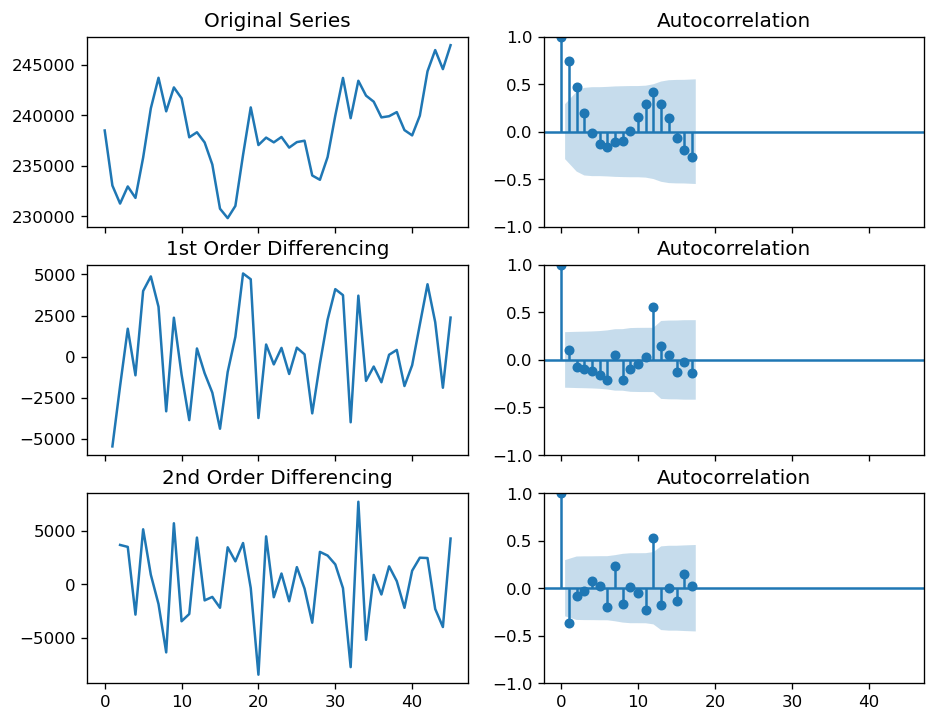

In [44]:
# Below i have plotted original, 1st and the 2nd difference 
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Mining']); axes[0, 0].set_title('Original Series')
plot_acf(df['Mining'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Mining'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Mining'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Mining'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Mining'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [45]:
# Finding p, d and q

import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonalp = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [46]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Mining'],order=param,seasonal_order=param_seasonal
                                            ,enforce_stationarity=False
                                            ,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1244.0518382383343
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1276.1820394958058
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:637.4336520275186
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:410.0360575722678
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:651.2293557505452
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:736.160542306408
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:427.5175507867408
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:404.108813814991
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1187.5620275027254
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:464119.2596613242
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:605.158499204435
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:374.09992524540377
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:910.5704793789205
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:859.3558669854083
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:412.8937475660121
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:356.6856567607621
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:819.6903696804724
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1527.2242216680718
ARIMA(0,

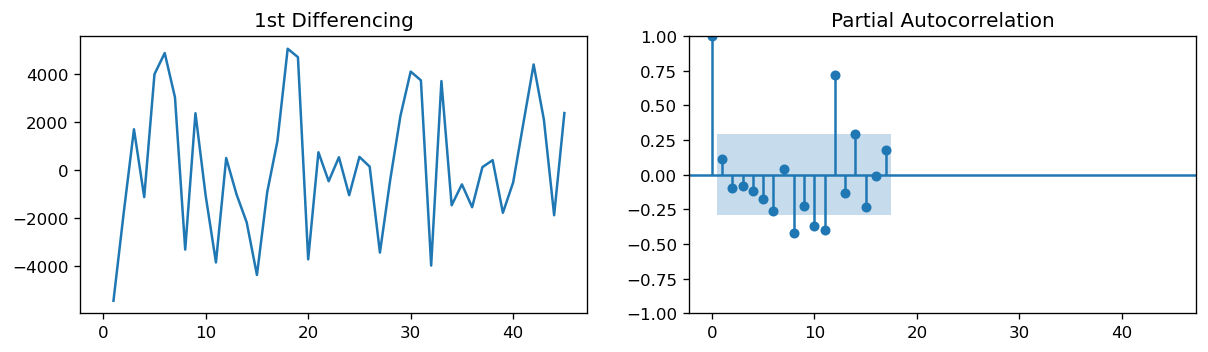

In [47]:
# PACF plot to find AR (p)
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Mining.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Mining.diff().dropna(), ax=axes[1])

plt.show()

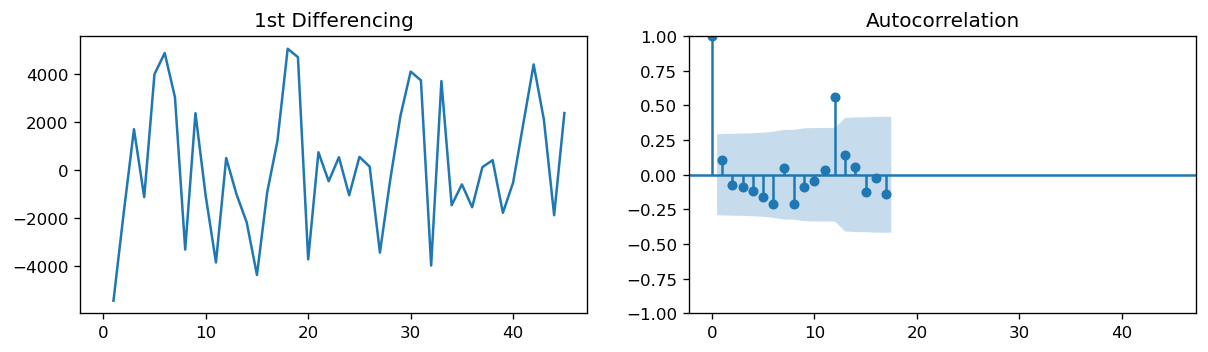

In [48]:
# PACF plot to find MA (q)
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Mining.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Mining.diff().dropna(), ax=axes[1])

plt.show()

In [49]:
# Using ARIMA model with order 1,1,1 o
model = ARIMA(df.Mining, order=(1,1,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Mining   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.639
Date:                Sat, 15 Apr 2023   AIC                            841.278
Time:                        08:44:41   BIC                            846.698
Sample:                             0   HQIC                           843.299
                                 - 46                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2040      1.448      0.141      0.888      -2.635       3.043
ma.L1         -0.2297      1.377     -0.167      0.868      -2.929       2.470
sigma2      7.124e+06   2.15e+06      3.318      0.0

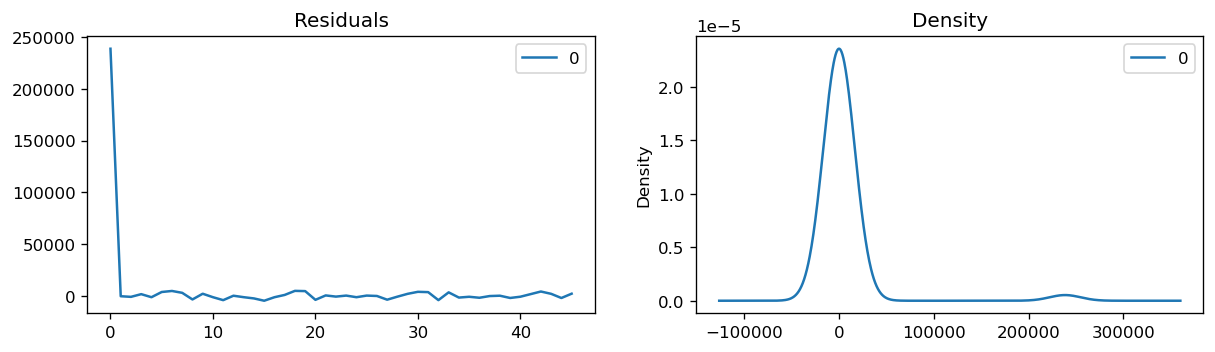

In [50]:
# Plot residual to see if any errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [32]:
import datetime
df['Period'] = df['Period'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [33]:
# Create Training and Test first 25 months
train = df.Mining.values[:25]
test = df.Mining.values[25:]

Plotting ARIMA Model
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -224.065
Date:                Sat, 15 Apr 2023   AIC                            454.130
Time:                        08:43:13   BIC                            457.664
Sample:                             0   HQIC                           455.067
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1994      1.784      0.112      0.911      -3.297       3.695
ma.L1         -0.2247      1.685     -0.133      0.894      -3.527       3.078
sigma2      8.298e+06   4.99e-0

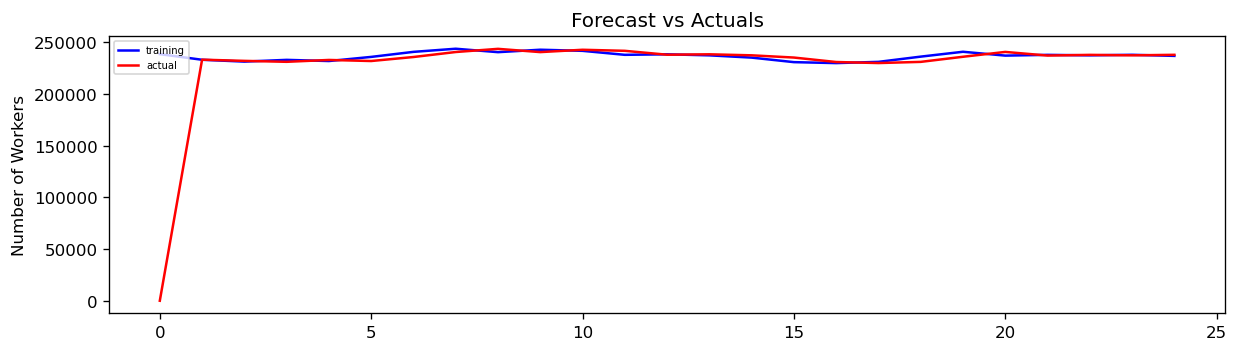

In [39]:
# Checking the prediction using the training data
print('Plotting ARIMA Model')
model = ARIMA(train, order=(1,1,1))
results_ARIMA = model.fit()
print(results_ARIMA.summary())
plt.plot(train,label='training',color='b')
plt.plot(results_ARIMA.fittedvalues,label='actual', color='r')
plt.title('Forecast vs Actuals' .format(sum((results_ARIMA.fittedvalues-train)**2)))
plt.legend(loc='upper left', fontsize=6)
plt.ylabel('Number of Workers')
plt.show()

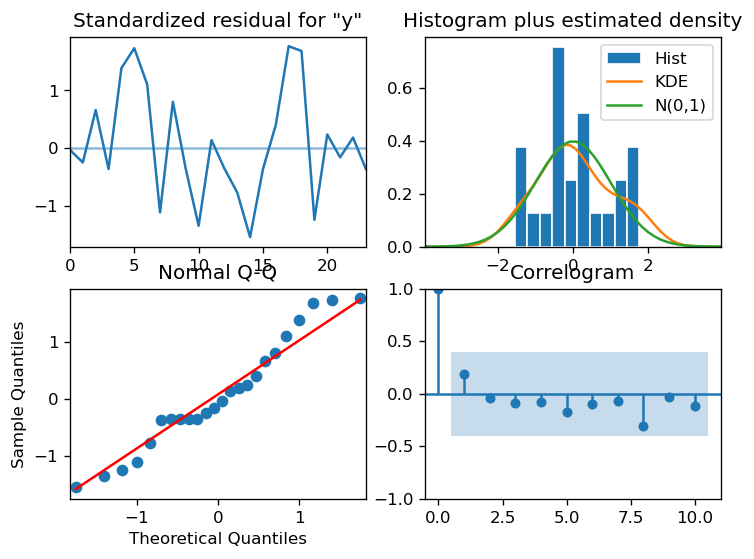

In [35]:
# reviewing using residual plot
results_ARIMA.plot_diagnostics(figsize=(7,5))
plt.show()

Plotting ARIMA Model


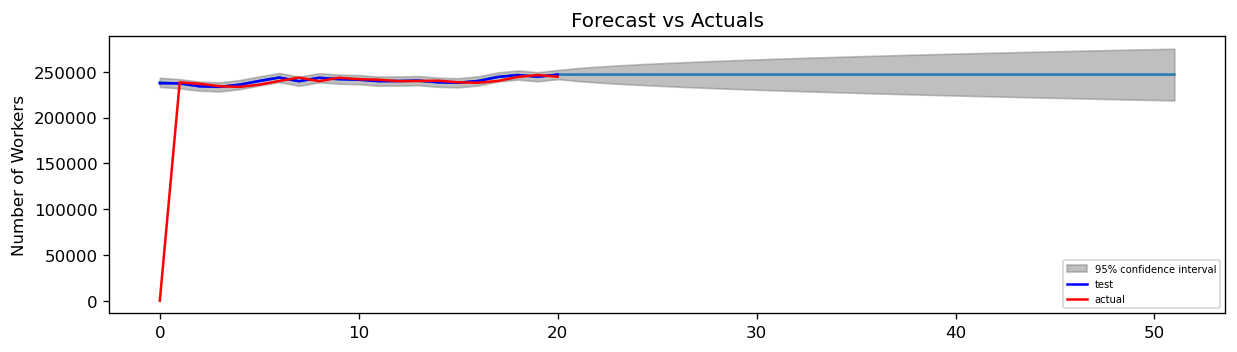

In [38]:
# Forecasting employment for next six months 
# Forcasting look good

print('Plotting ARIMA Model')
model = ARIMA(test, order=(1,1,1))
results_ARIMA = model.fit()

plot_predict(results_ARIMA,start=1, end=52,label='forecast',dynamic=False, color= 'yellow')
plt.plot(test,label='test',color='b')
plt.plot(results_ARIMA.fittedvalues,label='actual', color='r')
plt.title('Forecast vs Actuals'.format(sum((results_ARIMA.fittedvalues-test)**2)))
plt.ylabel('Number of Workers')
plt.legend(loc='lower right', fontsize=6)
plt.show()